In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread

# Analysis of the coefficient matrices

In [2]:
for mat_name in ["spa1.mtx", "spa2.mtx", "vem1.mtx", "vem2.mtx"]:
    print(f"\n#### Matrix: {mat_name} ####")
    
    # Reads the matrix
    A = np.array(mmread(f"..\Project1-Alternative-Sparse\\data\\{mat_name}").todense())

    print("A: ", A[:3, :3])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\1158307970.py:5: SyntaxWarning: invalid escape sequence '\P'
  A = np.array(mmread(f"..\Project1-Alternative-Sparse\\data\\{mat_name}").todense())



#### Matrix: spa1.mtx ####
A:  [[9.61e+02 0.00e+00 0.00e+00]
 [0.00e+00 7.45e+02 7.18e-01]
 [0.00e+00 7.18e-01 5.24e+02]]

#### Matrix: spa2.mtx ####
A:  [[2814.    0.    0.]
 [   0. 1974.    0.]
 [   0.    0. 1401.]]

#### Matrix: vem1.mtx ####
A:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

#### Matrix: vem2.mtx ####
A:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Density patterns

<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\4169250758.py:12: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()



#### Matrix: spa1.mtx ####


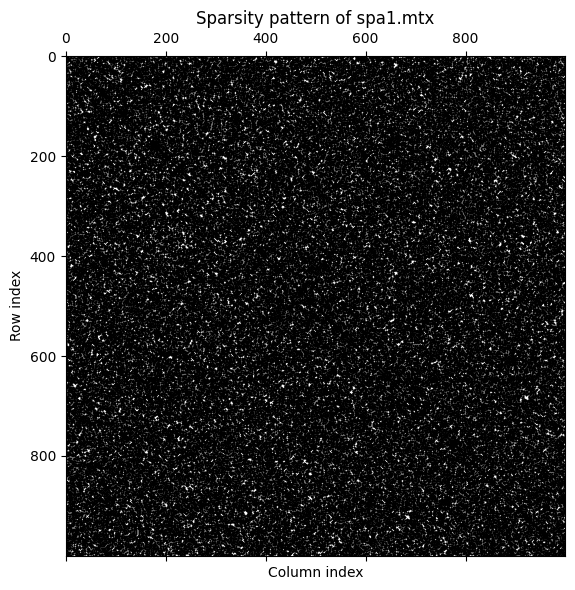


#### Matrix: spa2.mtx ####


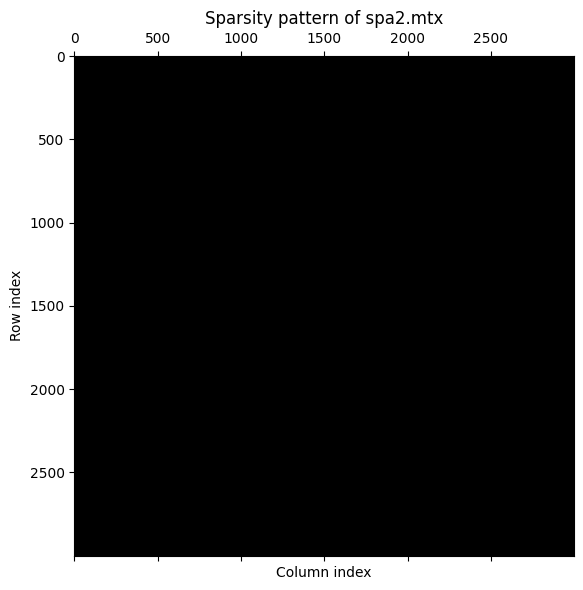


#### Matrix: vem1.mtx ####


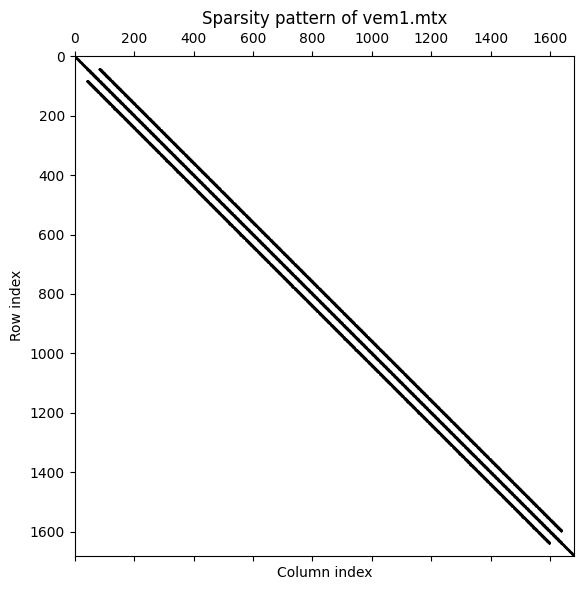


#### Matrix: vem2.mtx ####


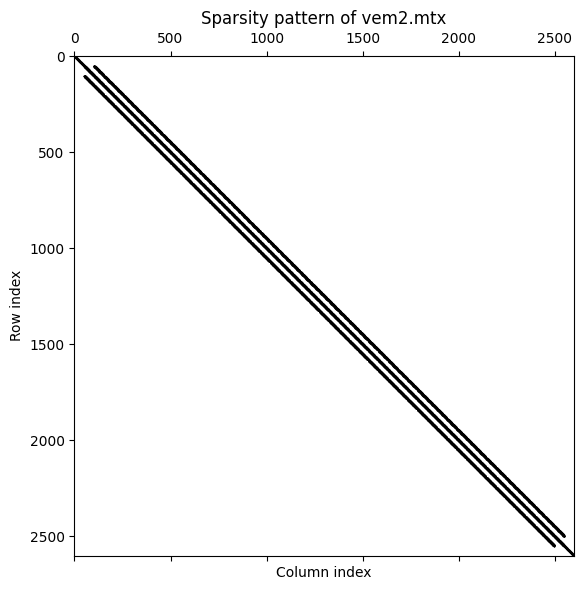

In [3]:
import matplotlib.pyplot as plt
from scipy.io import mmread
from scipy.sparse import csr_matrix
import os

matrices = ["spa1.mtx", "spa2.mtx", "vem1.mtx", "vem2.mtx"]

for mat_name in matrices:
    print(f"\n#### Matrix: {mat_name} ####")
    
    # Read and convert to CSR
    A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()

    tol = 1e-14

    # A is CSR matrix
    # A.data.shape == number of stored elements

    # Create an array of row indices for each element in A.data
    row_indices = np.empty_like(A.data, dtype=int)
    for i in range(A.shape[0]):
        start = A.indptr[i]
        end = A.indptr[i+1]
        row_indices[start:end] = i


    # Now apply mask to data, row_indices, and column indices
    mask = np.abs(A.data) > tol

    rows_filt = row_indices[mask]
    cols_filt = A.indices[mask]
    data_filt = A.data[mask]

    A_filtered = csr_matrix((data_filt, (rows_filt, cols_filt)), shape=A.shape)


    # Plot with improved formatting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.spy(A_filtered, markersize=0.5, color='black')  # smaller dots for large matrices

    ax.set_title(f"Sparsity pattern of {mat_name}")
    ax.set_xlabel("Column index")
    ax.set_ylabel("Row index")
    ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()


#### Matrix: spa1.mtx ####


<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\3537713068.py:12: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\3537713068.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


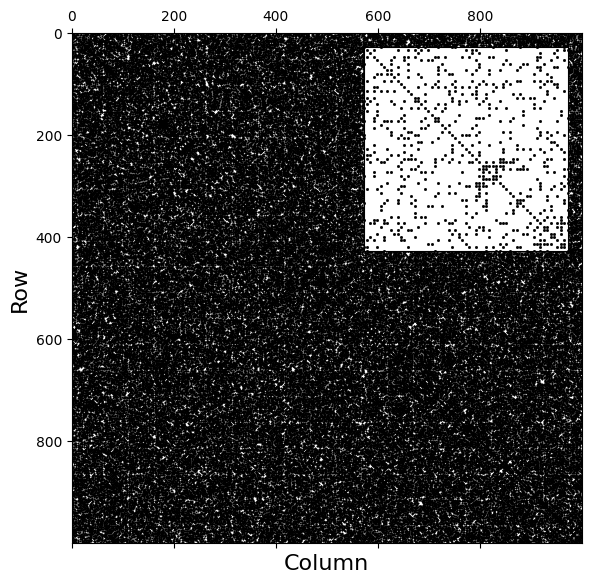


#### Matrix: spa2.mtx ####


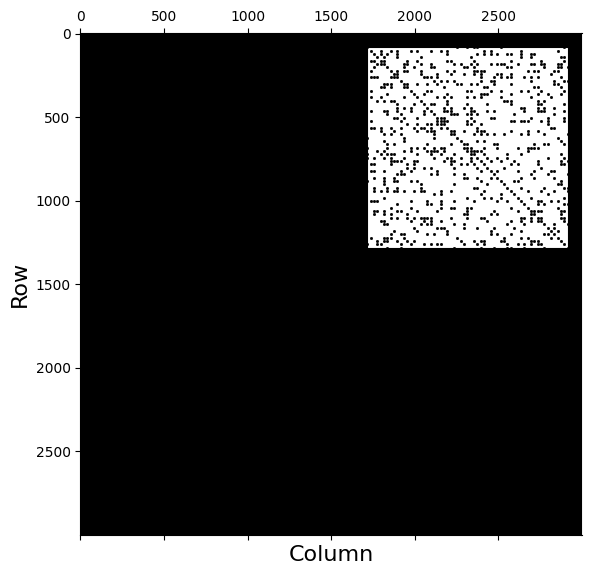


#### Matrix: vem1.mtx ####


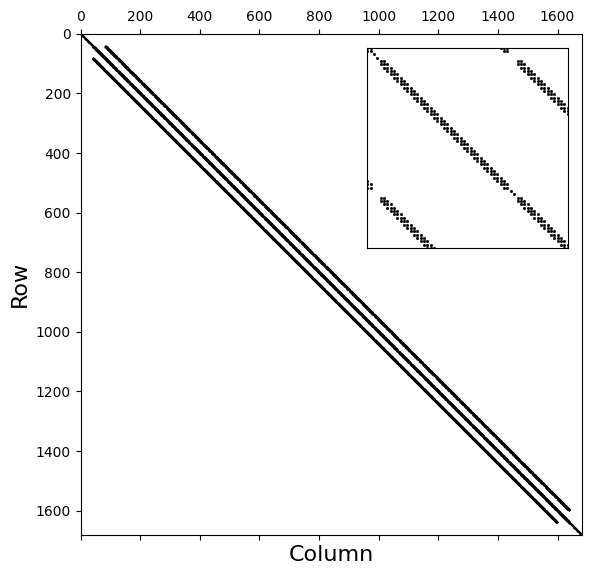


#### Matrix: vem2.mtx ####


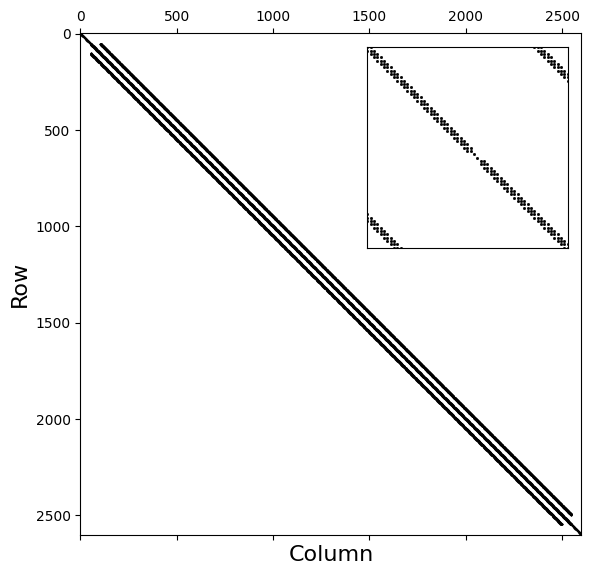

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.io import mmread
import os

matrices = ["spa1.mtx", "spa2.mtx", "vem1.mtx", "vem2.mtx"]

for mat_name in matrices:
    print(f"\n#### Matrix: {mat_name} ####")
    
    # Read and convert the matrix
    A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()
    
    # Main plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.spy(A, markersize=0.5, color='black')
    ax.set_title("")
    ax.set_xlabel("Column", fontsize=16)
    ax.set_ylabel("Row", fontsize=16)
    ax.set_aspect('equal')

    # Inset: zoom-in on top-left 200x200
    axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=1)
    axins.spy(A, markersize=1, color='black')
    axins.set_xlim(120, 180)
    axins.set_ylim(180, 120)  # flipped for spy()
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_title("", fontsize=8)

    plt.tight_layout()
    plt.show()

### Distribution of coefficients

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread

matrices = ["spa1.mtx", "spa2.mtx"]

for mat_name in matrices:
    # Read matrix
    A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).toarray()

    tol = 1e-16
    values = A.flatten()
    nonzero_values = values[np.abs(values) > tol]
    abs_nonzero_values = np.abs(nonzero_values)

    # Plot histogram with many bins (frequency, not density)
    plt.figure(figsize=(7, 5))
    bins = np.logspace(np.log10(abs_nonzero_values.min()), np.log10(abs_nonzero_values.max()), 200)
    plt.hist(abs_nonzero_values, bins=bins, color='tab:blue', alpha=0.9)

    plt.xscale('log')  # Keeps wide ranges visible
    plt.xlabel("Value", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
    #plt.title(f"Histogram of Non-zero Values – {mat_name}", fontsize=16)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\3820243454.py:10: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\3820243454.py:10: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()


AttributeError: 'csr_matrix' object has no attribute 'flatten'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread

matrices = ["spa1.mtx", "spa2.mtx", "vem1.mtx", "vem2.mtx"]

for mat_name in matrices:
    # Read matrix
    A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).toarray()

    tol = 1e-14
    values = A.flatten()

    # Filter out near-zero values
    nonzero_values = values[np.abs(values) > tol]

    # Count unique values and their frequencies
    unique_vals, counts = np.unique(nonzero_values, return_counts=True)

    # Sort by value for clearer plotting
    sorted_indices = np.argsort(unique_vals)
    unique_vals = unique_vals[sorted_indices]
    print(unique_vals)
    counts = counts[sorted_indices]

    # Plot as bar plot
    plt.figure(figsize=(7, 5))
    plt.bar(unique_vals, counts, width=0.05 if mat_name.startswith('vem') else 1.0, color='tab:blue', alpha=0.8)
    
    plt.xlabel("Value", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    #plt.title(f"Matrix: {mat_name}", fontsize=16)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    # Optional: Log scale for y if needed
    if np.max(counts) / np.min(counts) > 100:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\3423509077.py:10: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\3423509077.py:10: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()


AttributeError: 'csr_matrix' object has no attribute 'flatten'

### Numeric properties

In [7]:
from scipy.io import mmread
import os
import numpy as np

matrices = ["spa1.mtx", "spa2.mtx", "vem1.mtx", "vem2.mtx"]

for mat_name in matrices:
    A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()
    data = A.data  # nonzero values only
    print(f"\n#### Matrix: {mat_name} ####")
    print(f"Min value (nonzero): {data.min()}")
    print(f"Max value (nonzero): {data.max()}")
    print(f"Shape: {A.shape},  Nonzeros: {A.nnz},  Density: {A.nnz / (A.shape[0] * A.shape[1]):.4f}")


#### Matrix: spa1.mtx ####
Min value (nonzero): 0.0
Max value (nonzero): 999.0
Shape: (1000, 1000),  Nonzeros: 182434,  Density: 0.1824

#### Matrix: spa2.mtx ####
Min value (nonzero): 0.0
Max value (nonzero): 2997.0
Shape: (3000, 3000),  Nonzeros: 1633298,  Density: 0.1815

#### Matrix: vem1.mtx ####
Min value (nonzero): -0.5000000000000022
Max value (nonzero): 2.9999999999999005
Shape: (1681, 1681),  Nonzeros: 13385,  Density: 0.0047

#### Matrix: vem2.mtx ####
Min value (nonzero): -0.5000000000000029
Max value (nonzero): 2.9999999999999005
Shape: (2601, 2601),  Nonzeros: 21225,  Density: 0.0031


<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\4271744848.py:8: SyntaxWarning: invalid escape sequence '\P'
  A = mmread(os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)).tocsr()


In [8]:
import numpy as np
import scipy
from scipy.io import mmread
from scipy.sparse import csr_matrix, isspmatrix
from scipy.sparse.linalg import eigsh
from scipy.linalg import svd, det
import os
from scipy.sparse.linalg import eigsh

def is_symmetric(A, tol=1e-10):
    if not isspmatrix(A):
        A = csr_matrix(A)
    return (A - A.T).nnz == 0 or np.allclose((A - A.T).data, 0, atol=tol)

def is_positive_definite(A):
    try:
        eigs = eigsh(A, k=1, which='SA', return_eigenvectors=False)
        return np.all(eigs > 0)
    except:
        return False

def estimate_rank(A, tol=1e-10):
    if A.shape[0] < 500:
        A_dense = A.toarray()
        u, s, vh = svd(A_dense, full_matrices=False)
        return np.sum(s > tol)
    else:
        return "large (not estimated)"

def compute_bandwidth(A):
    A_csr = A.tocsr()
    rows, cols = A_csr.nonzero()
    return max(abs(rows - cols))

def is_diagonally_dominant(A):
    A_csr = A.tocsr()
    diag = np.abs(A_csr.diagonal())
    off_diag_sum = np.abs(A_csr).sum(axis=1).A1 - diag
    return np.all(diag >= off_diag_sum)

def is_non_singular(A):
    try:
        if A.shape[0] > 5000:
            return "Too large to test"
        else:
            det_val = np.linalg.det(A.toarray())
            return not np.isclose(det_val, 0)
    except Exception as e:
        return f"Error: {str(e)}"

def compute_extreme_eigenvalues(A, k=1):
    try:
        # Only for symmetric matrices
        lambda_max = eigsh(A, k=k, which='LA', return_eigenvectors=False)[0]
        lambda_min = eigsh(A, k=k, which='SA', return_eigenvectors=False)[0]
        cond_number = abs(lambda_max / lambda_min) if lambda_min != 0 else np.inf
        return lambda_min, lambda_max, cond_number
    except Exception as e:
        return "N/A", "N/A", f"Error: {str(e)}"

def count_near_zero_entries(A, threshold=1e-10):
    return np.sum(np.abs(A.data) < threshold)

def count_high_precision_entries(A, digits=8):
    count = 0
    for val in A.data:
        decimal_part = str(val).split('.')[-1]
        if len(decimal_part.rstrip('0')) >= digits:
            count += 1
    return count

def count_denormals(A):
    tiny = np.finfo(float).tiny
    return np.sum((A.data != 0) & (np.abs(A.data) < tiny))


def analyze_matrix(A):
    tol = 1e-14
    
    sym = is_symmetric(A)
    pd = is_positive_definite(A) if sym else "N/A"
    rank = estimate_rank(A)
    bandwidth = compute_bandwidth(A)
    density = np.count_nonzero(np.abs(A.data) > tol) / (A.shape[0] * A.shape[1])
    diag_dom = is_diagonally_dominant(A)
    non_singular = is_non_singular(A)
    small_magnitude = count_near_zero_entries(A) / (A.shape[0] * A.shape[1])
    high_prec = count_high_precision_entries(A) / (A.shape[0] * A.shape[1])
    denorm = count_denormals(A) / (A.shape[0] * A.shape[1])

    if sym:
        λmin, λmax, cond = compute_extreme_eigenvalues(A)
    else:
        λmin, λmax, cond = "N/A", "N/A", "Only for symmetric matrices"

    return {
        "Symmetric": sym,
        "Positive Definite": pd,
        "Diagonal Dominant": diag_dom,
        "Rank": rank,
        "Bandwidth": bandwidth,
        "Density": f"{density:.4f}",
        "Non-Singular": non_singular,
        "Min Eigenvalue": f"{λmin:.9e}" if isinstance(λmin, (float, int)) else λmin,
        "Max Eigenvalue": f"{λmax:.9e}" if isinstance(λmax, (float, int)) else λmax,
        "Eigenvalue Ratio (Cond#)": f"{cond:.9e}" if isinstance(cond, (float, int)) else cond,
        "Small Magnitude": small_magnitude,
        "High Precision": high_prec,
        "Denorm": denorm
    }

# === Run on your matrices ===
matrices = ["spa1.mtx", "spa2.mtx", "vem1.mtx", "vem2.mtx"]

for mat_name in matrices:
    path = os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)
    A = mmread(path).tocsr()
    print(f"\nMatrix: {mat_name}")
    props = analyze_matrix(A)
    for key, val in props.items():
        print(f"  {key:18s}: {val}")

<>:116: SyntaxWarning: invalid escape sequence '\P'
<>:116: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_50320\476063175.py:116: SyntaxWarning: invalid escape sequence '\P'
  path = os.path.join("..\Project1-Alternative-Sparse", "data", mat_name)



Matrix: spa1.mtx


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


  Symmetric         : True
  Positive Definite : True
  Diagonal Dominant : False
  Rank              : large (not estimated)
  Bandwidth         : 998
  Density           : 0.1823
  Non-Singular      : True
  Min Eigenvalue    : 4.879788597e-01
  Max Eigenvalue    : 9.994557625e+02
  Eigenvalue Ratio (Cond#): 2.048153814e+03
  Small Magnitude   : 0.00017
  High Precision    : 0.003872
  Denorm            : 0.0

Matrix: spa2.mtx
  Symmetric         : True
  Positive Definite : True
  Diagonal Dominant : False
  Rank              : large (not estimated)
  Bandwidth         : 2998
  Density           : 0.1813
  Non-Singular      : True
  Min Eigenvalue    : 2.123531790e+00
  Max Eigenvalue    : 2.998358511e+03
  Eigenvalue Ratio (Cond#): 1.411967800e+03
  Small Magnitude   : 0.00017333333333333334
  High Precision    : 0.004022
  Denorm            : 0.0

Matrix: vem1.mtx
  Symmetric         : True
  Positive Definite : True
  Diagonal Dominant : False
  Rank              : large (not est